#### Name : Rajendra Karki
#### Roll: 25
#### Subject: Applied Machine Learning

# Multivarient Linear Regression

Write program in python that trains multivariate linear regression

*  Create toy dataset required for multivariate regression.
*  Plot the given dataset.
*  Write a function for linear regression model.
*  Write a function for Standard Scaler.
*  Write a function for computing loss - use MSE as loss function.
*  Train the model.
*  Evaluate the model


In [33]:
#import necessary library
import numpy as np
np.random.seed(25)

def generate_dataset(no_of_sample, no_of_features, coef, intercept):
  #generate the value for x
  X = np.random.randn(no_of_sample, no_of_features)*10
  #generate the value for y based on coefficient and intercept
  y = np.dot(X,coef) + intercept + np.random.normal(0,1,no_of_sample)
  #return the value of x and y
  return X,y

In [34]:
#now define the parameters for the generate_toydataset function
no_of_sample = 100
no_of_features = 2
coeff = np.array([3,2])
intercept = 10

#call the function to generate the data
X, y = generate_dataset(no_of_sample, no_of_features, coeff, intercept)

#print the shape of the data x and y
print(X.shape)
print(y.shape)


(100, 2)
(100,)


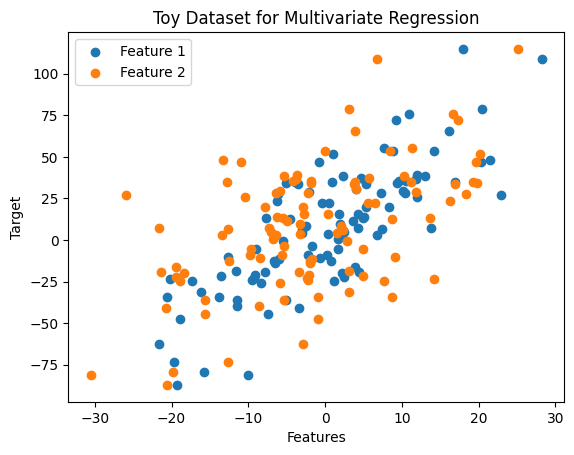

In [35]:
import matplotlib.pyplot as plt

#plot the data set
plt.scatter(X[:, 0], y, label='Feature 1')
plt.scatter(X[:, 1], y, label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.title('Toy Dataset for Multivariate Regression')
plt.show()

In [36]:
#Implementing the Linear regression model
class LinearRegression:
  def __init__(self, lr = 0.01, iterations = 1000):
    self.lr = lr
    self.iterations = iterations
    self.weights = None
    self.bias = None

  def fitModel(self, X, y):
    samples = X.shape[0]
    features = X.shape[1]
    self.weights = np.zeros(features)
    self.bias = 0

    #for gradient Descent
    for _ in range(self.iterations):
      y_predicted = np.dot(X, self.weights) + self.bias

      #compute gradient
      dw = (1/samples) * np.dot(X.T, (y_predicted - y))
      db = (1/samples) * np.sum(y_predicted - y)

      #now update the weight and bias
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self,X):
      return np.dot(X, self.weights) + self.bias



In [37]:
# Implementing the Standard Scalers now
class StandardScaler:
  def __init__(self):
    self.mean = None
    self.sd = None


  def fit(self, X):
    self.mean = np.mean(X, axis = 0)
    self.sd = np.std(X, axis = 0)


  def transform(self , X):
    X_scaled = (X - self.mean) / self.sd
    return X_scaled


In [38]:
#compute the mean Square error (MSE)
def MSE(y_actual, y_pred):
  return np.mean((y_actual - y_pred)** 2)


In [39]:

#scale the data and train the model
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#model training
lm = LinearRegression(lr = 0.01, iterations = 1000)
lm.fitModel(X_scaled, y)


In [40]:
#now evaluate the model
y_pred = lm.predict(X_scaled)
MSE = MSE(y, y_pred)
print(f"Mean Squared Error: {MSE}")


Mean Squared Error: 0.9830840128292175
